In [ ]:
import zipfile
with zipfile.ZipFile('/content/nummular masks.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
with zipfile.ZipFile('/content/nummular.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
!pip install keras_unet_collection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import glob
from PIL import Image
import math
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageEnhance
from keras_unet_collection import models

In [ ]:
masks=[]
for file in glob.glob("/content/nummular masks/*"):
  masks.append(file)
masks.sort()
print(masks)

['/content/nummular masks/1.png', '/content/nummular masks/10.png', '/content/nummular masks/100.png', '/content/nummular masks/101.png', '/content/nummular masks/102.png', '/content/nummular masks/103.png', '/content/nummular masks/104.png', '/content/nummular masks/105.png', '/content/nummular masks/106.png', '/content/nummular masks/107.png', '/content/nummular masks/108.png', '/content/nummular masks/109.png', '/content/nummular masks/11.png', '/content/nummular masks/110.png', '/content/nummular masks/111.png', '/content/nummular masks/112.png', '/content/nummular masks/113.png', '/content/nummular masks/114.png', '/content/nummular masks/115.png', '/content/nummular masks/116.png', '/content/nummular masks/117.png', '/content/nummular masks/118.png', '/content/nummular masks/119.png', '/content/nummular masks/12.png', '/content/nummular masks/120.png', '/content/nummular masks/121.png', '/content/nummular masks/122.png', '/content/nummular masks/123.png', '/content/nummular masks

In [ ]:
images=[]
for file in glob.glob("/content/nummular/*"):
  images.append(file)
images.sort()
print(images)

['/content/nummular/1.jpeg', '/content/nummular/10.jpeg', '/content/nummular/100.jpg', '/content/nummular/101.jpg', '/content/nummular/102.jpg', '/content/nummular/103.jpg', '/content/nummular/104.jpg', '/content/nummular/105.jpg', '/content/nummular/106.jpg', '/content/nummular/107.jpg', '/content/nummular/108.jpg', '/content/nummular/109.jpg', '/content/nummular/11.jpeg', '/content/nummular/110.jpg', '/content/nummular/111.jpg', '/content/nummular/112.jpg', '/content/nummular/113.jpg', '/content/nummular/114.jpg', '/content/nummular/115.jpg', '/content/nummular/116.jpg', '/content/nummular/117.jpg', '/content/nummular/118.jpg', '/content/nummular/119.jpg', '/content/nummular/12.jpeg', '/content/nummular/120.jpg', '/content/nummular/121.jpg', '/content/nummular/122.jpg', '/content/nummular/123.jpg', '/content/nummular/124.jpg', '/content/nummular/125.jpg', '/content/nummular/126.jpg', '/content/nummular/127.jpg', '/content/nummular/128.jpg', '/content/nummular/129.jpg', '/content/numm

In [ ]:
def enhance_texture_with_gabor(image, ksize=5, sigma=3, theta=np.pi/4, lambd=5, gamma=0.25):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    enhanced_texture = cv2.filter2D(image,ddepth=-1,kernel=gabor_kernel)
    return enhanced_texture

In [ ]:
image=[]
for img in images:
  img=cv2.imread(img)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(224,224))
  img1=img
  img=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
  gamma = 2
  img = np.power(img / 255.0, gamma) * 255.0
  img= np.uint8(img)
  r,g,b=cv2.split(img1)
  img=cv2.merge([r,img,b])
# Display the enhanced image


  img=Image.fromarray(img)

  img1=img.transpose(Image.FLIP_LEFT_RIGHT)
  img2=img.transpose(Image.FLIP_TOP_BOTTOM)
  img3=np.array(img.rotate(30,expand=True))
  img3=cv2.resize(img3,(224,224))



  img9=np.array(img.rotate(210,expand=True))
  img9=cv2.resize(img9,(224,224))

  img11=np.array(img.rotate(270,expand=True))
  img11=cv2.resize(img11,(224,224))
  img12=np.array(img.rotate(300,expand=True))
  img12=cv2.resize(img12,(224,224))
  img13=np.array(img.rotate(330,expand=True))
  img13=cv2.resize(img13,(224,224))
  img14=np.array(img.rotate(360,expand=True))
  img14=cv2.resize(img14,(224,224))
  enhancer = ImageEnhance.Brightness(img)
  img15 = enhancer.enhance(1.5)







  image.append(np.array(img))
  image.append(np.array(img1))
  image.append(np.array(img2))
  image.append(np.array(img3))


  image.append(np.array(img9))

  image.append(np.array(img11))
  image.append(np.array(img12))
  image.append(np.array(img13))
  image.append(np.array(img14))
  image.append(np.array(img15))

In [ ]:
np.array(image).shape

(2630, 224, 224, 3)

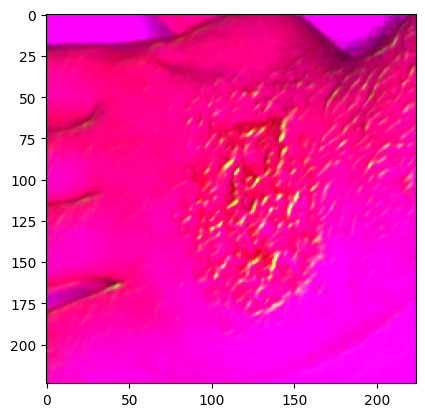

In [ ]:
plt.imshow(image[1399])

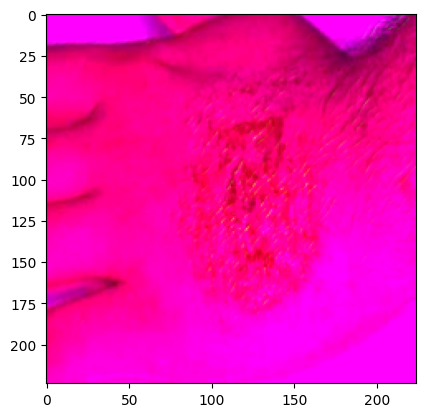

In [ ]:
plt.imshow(image[1399],cmap='gray')

(array([[ 15.,  20.,  17., ...,  14.,  26.,  76.],
        [ 12.,  20.,  19., ...,  12.,  30.,  78.],
        [ 15.,  12.,  22., ...,  16.,  31.,  81.],
        ...,
        [ 14.,   8.,  10., ...,   4.,  11., 155.],
        [ 10.,   8.,  10., ...,   8.,   9., 154.],
        [  4.,  14.,   7., ...,   8.,  12., 152.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 BarContainer objects>)

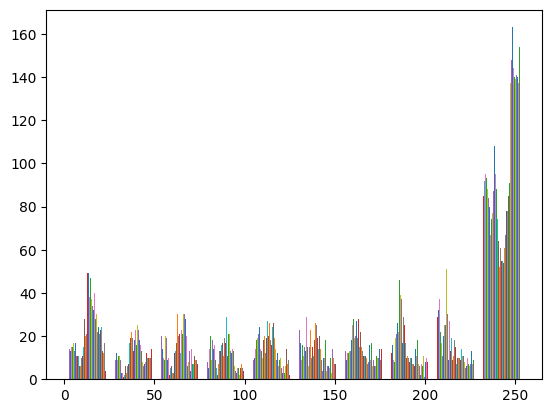

In [ ]:
plt.hist(image[1399])

In [ ]:
image[0].shape

(224, 224, 3)

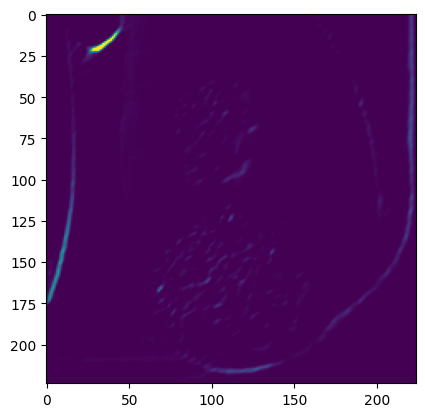

In [ ]:
def enhance_texture_with_gabor(image, ksize=5, sigma=3, theta=np.pi/4, lambd=5, gamma=0.25):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    enhanced_texture = cv2.filter2D(image,ddepth=-1,kernel=gabor_kernel)
    return enhanced_texture
img=cv2.imread("/content/195.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img1=img
img=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
gamma =2
# Apply gamma correction
img = np.power(img/ 255.0, gamma) * 255.0

# Convert to uint8 data type
img= np.uint8(img)

plt.imshow(img)

(array([[222.,   2.,   0., ...,   0.,   0.,   0.],
        [217.,   3.,   1., ...,   0.,   0.,   0.],
        [216.,   2.,   1., ...,   0.,   0.,   0.],
        ...,
        [110.,  89.,  25., ...,   0.,   0.,   0.],
        [200.,  24.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 BarContainer objects>)

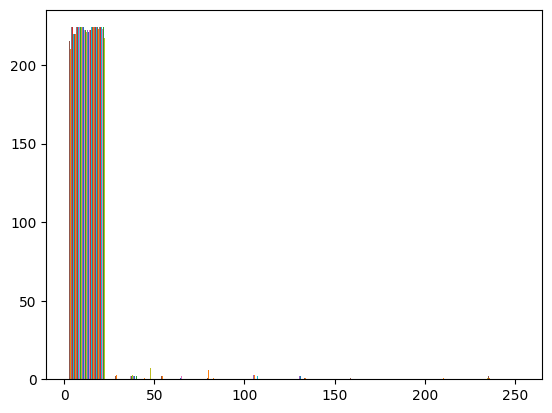

In [ ]:
plt.hist(img)

In [ ]:

-+mport cv2

# Load an image in grayscale
image = cv2.imread('/content/159.jpg', cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object (optional, but can be useful to fine-tune parameters)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
enhanced_image = clahe.apply(image)

plt.imshow(enhanced_image)

SyntaxError: ignored

In [ ]:
import cv2
import numpy as np

# Load an image in grayscale
image = cv2.imread('/content/158.jpg', cv2.IMREAD_GRAYSCALE)
image=enhance_texture_with_gabor(image)
# Define the gamma value (e.g., gamma > 1 increases contrast, gamma < 1 decreases contrast)
gamma = 1.5

# Apply gamma correction
enhanced_image = np.power(image / 255.0, gamma) * 255.0

# Convert to uint8 data type
enhanced_image = np.uint8(enhanced_image)

# Display the enhanced image
plt.imshow(enhanced_image)

In [ ]:
plt.imshow(img)

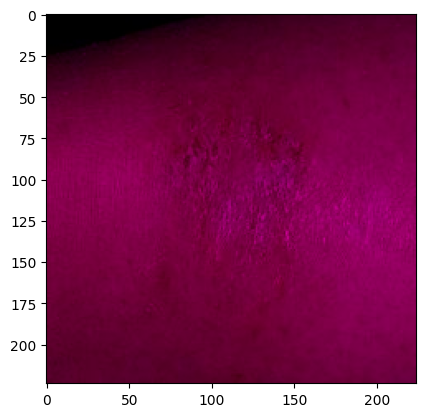

In [ ]:
plt.imshow(image[0])

ValueError: ignored

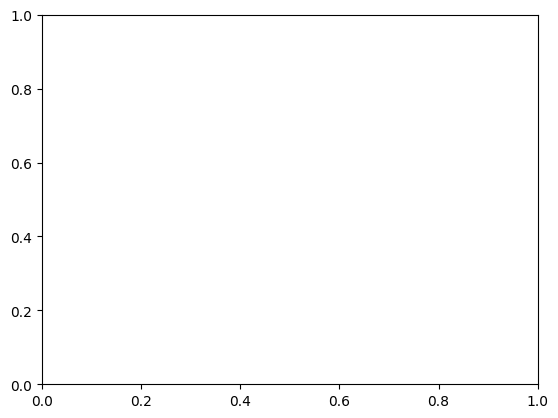

In [ ]:
.plt.hist(image[0])

In [ ]:
im=cv2.imread("/content/nummular/1.jpeg")
im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

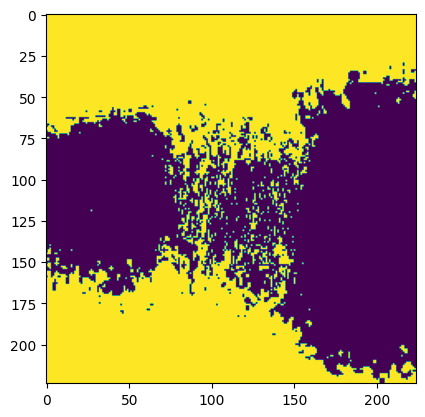

In [ ]:
plt.imshow(im<90)

(array([[27.,  6., 11., ...,  2.,  0.,  0.],
        [28.,  5., 11., ...,  0.,  0.,  0.],
        [26.,  7., 11., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 32.,  2.,  0.],
        [ 0.,  0.,  0., ..., 24.,  0.,  0.],
        [ 0.,  0.,  0., ..., 33.,  0.,  0.]]),
 array([  0. ,  17.7,  35.4,  53.1,  70.8,  88.5, 106.2, 123.9, 141.6,
        159.3, 177. ]),
 <a list of 224 BarContainer objects>)

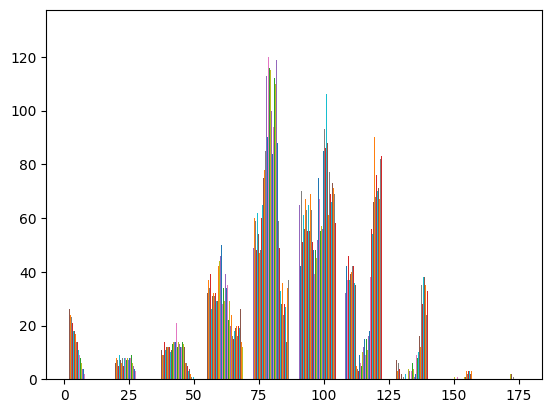

In [ ]:
plt.hist(im)

In [ ]:
plt.imshow(image[1399])

NameError: ignored

(array([[221.,   2.,   0., ...,   0.,   0.,   0.],
        [220.,   0.,   0., ...,   1.,   2.,   0.],
        [217.,   0.,   1., ...,   1.,   4.,   0.],
        ...,
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 BarContainer objects>)

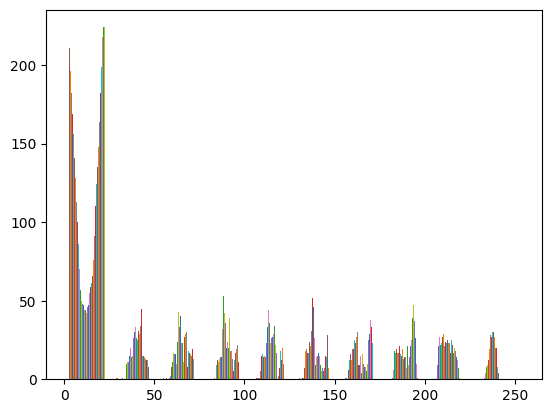

In [ ]:
plt.hist(cv2.cvtColor(image[1299],cv2.COLOR_BGR2GRAY))

(array([[27.,  6., 11., ...,  2.,  0.,  0.],
        [28.,  5., 11., ...,  0.,  0.,  0.],
        [26.,  7., 11., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 32.,  2.,  0.],
        [ 0.,  0.,  0., ..., 24.,  0.,  0.],
        [ 0.,  0.,  0., ..., 33.,  0.,  0.]]),
 array([  0. ,  17.7,  35.4,  53.1,  70.8,  88.5, 106.2, 123.9, 141.6,
        159.3, 177. ]),
 <a list of 224 BarContainer objects>)

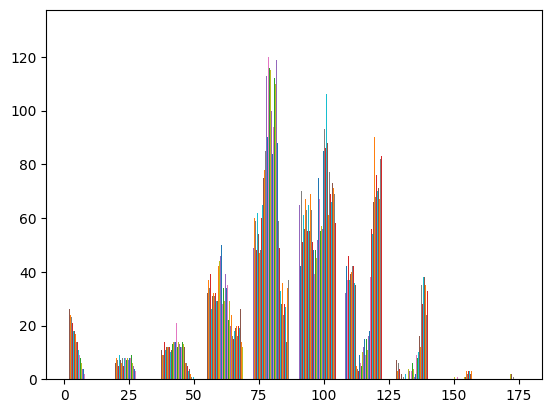

In [ ]:
img=cv2.imread("/content/nummular/1.jpeg",0)
plt.hist(img)

In [ ]:
mask=[]
for img in masks:
  img=Image.open(img)
  img=img.resize((224,224))
  img1=np.array(img.transpose(Image.FLIP_LEFT_RIGHT))
  img2=np.array(img.transpose(Image.FLIP_TOP_BOTTOM))

  img3=np.array(img.rotate(30,expand=True))
  img3=cv2.resize(img3,(224,224))


  img9=np.array(img.rotate(210,expand=True))
  img9=cv2.resize(img9,(224,224))

  img11=np.array(img.rotate(270,expand=True))
  img11=cv2.resize(img11,(224,224))
  img12=np.array(img.rotate(300,expand=True))
  img12=cv2.resize(img12,(224,224))
  img13=np.array(img.rotate(330,expand=True))
  img13=cv2.resize(img13,(224,224))
  img14=np.array(img.rotate(360,expand=True))
  img14=cv2.resize(img14,(224,224))


  enhancer = ImageEnhance.Brightness(img)
  img15 = enhancer.enhance(1.5)


  img=np.array(img)
  img=np.expand_dims(img,-1)
  img1=np.expand_dims(img1,-1)
  img2=np.expand_dims(img2,-1)
  img3=np.expand_dims(img3,-1)

  img9=np.expand_dims(img9,-1)

  img11=np.expand_dims(img11,-1)
  img12=np.expand_dims(img12,-1)
  img13=np.expand_dims(img13,-1)
  img14=np.expand_dims(img14,-1)
  img15=np.expand_dims(img15,-1)
  mask.append(np.array(img))
  mask.append(np.array(img1))
  mask.append(np.array(img2))
  mask.append(np.array(img3))


  mask.append(np.array(img9))

  mask.append(np.array(img11))
  mask.append(np.array(img12))
  mask.append(np.array(img13))
  mask.append(np.array(img14))
  mask.append(np.array(img15))

mask=np.array(mask)


In [ ]:
from keras.layers import Input,Conv2D,MaxPooling2D,concatenate,BatchNormalization,Dropout,Conv2DTranspose,UpSampling2D,Lambda
from keras.models import Model

In [ ]:
def unet_model(IMG_HEIGHT=224,IMG_WIDTH=224, IMG_CHANNELS=3):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)


    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
    return model

In [ ]:
model=unet_model()

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 224, 224, 16)         448       ['input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 224, 224, 16)         0         ['conv2d_38[0][0]']           
                                                                                                  
 conv2d_39 (Conv2D)          (None, 224, 224, 16)         2320      ['dropout_18[0][0]']          
                                                                                            

In [ ]:
# Image Normalization
image=np.array(image)
mask=np.array(mask)
print(image.shape,mask.shape)

(2630, 224, 224, 3) (2630, 224, 224, 1)


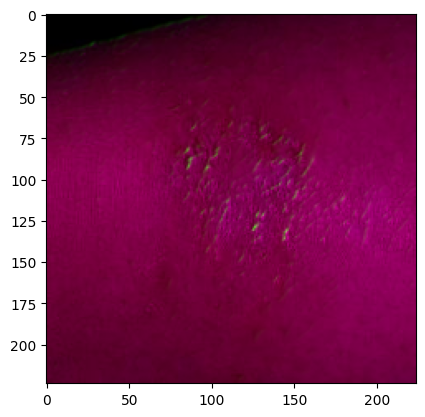

In [ ]:
plt.imshow(image[0])

In [ ]:
mask=mask/255
image=image/255

In [ ]:
model.fit(image,mask,epochs=30)

Epoch 1/30
83/83 [==============================] - 47s 296ms/step - loss: 0.5563 - accuracy: 0.6650
Epoch 2/30
83/83 [==============================] - 23s 274ms/step - loss: 0.4828 - accuracy: 0.7079
Epoch 3/30
83/83 [==============================] - 22s 270ms/step - loss: 0.4755 - accuracy: 0.7157
Epoch 4/30
83/83 [==============================] - 22s 270ms/step - loss: 0.4720 - accuracy: 0.7233
Epoch 5/30
83/83 [==============================] - 22s 271ms/step - loss: 0.4569 - accuracy: 0.7473
Epoch 6/30
83/83 [==============================] - 22s 271ms/step - loss: 0.4488 - accuracy: 0.7521
Epoch 7/30
83/83 [==============================] - 22s 270ms/step - loss: 0.4440 - accuracy: 0.7548
Epoch 8/30
83/83 [==============================] - 22s 269ms/step - loss: 0.4339 - accuracy: 0.7621
Epoch 9/30
83/83 [==============================] - 22s 270ms/step - loss: 0.4373 - accuracy: 0.7597
Epoch 10/30
83/83 [==============================] - 22s 270ms/step - loss: 0.4346 - accura

In [ ]:
model=models.unet_2d(n_labels=1,input_size=(224,224,3),output_activation='Sigmoid',activation='ReLU',filter_num=[16,32,64,128,256])
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(image,mask,epochs=30)

Epoch 1/30
83/83 [==============================] - 44s 262ms/step - loss: 0.5565 - accuracy: 0.6721
Epoch 2/30
83/83 [==============================] - 20s 247ms/step - loss: 0.4781 - accuracy: 0.7094
Epoch 3/30
83/83 [==============================] - 21s 252ms/step - loss: 0.4702 - accuracy: 0.7155
Epoch 4/30
83/83 [==============================] - 22s 259ms/step - loss: 0.4625 - accuracy: 0.7308
Epoch 5/30
83/83 [==============================] - 21s 258ms/step - loss: 0.4317 - accuracy: 0.7662
Epoch 6/30
83/83 [==============================] - 21s 254ms/step - loss: 0.4140 - accuracy: 0.7792
Epoch 7/30
83/83 [==============================] - 21s 256ms/step - loss: 0.4062 - accuracy: 0.7881
Epoch 8/30
83/83 [==============================] - 21s 257ms/step - loss: 0.3960 - accuracy: 0.7950
Epoch 9/30
83/83 [==============================] - 21s 256ms/step - loss: 0.3860 - accuracy: 0.8035
Epoch 10/30
83/83 [==============================] - 21s 256ms/step - loss: 0.3794 - accura

In [ ]:
models.

<module 'keras_unet_collection.models' from '/usr/local/lib/python3.10/dist-packages/keras_unet_collection/models.py'>

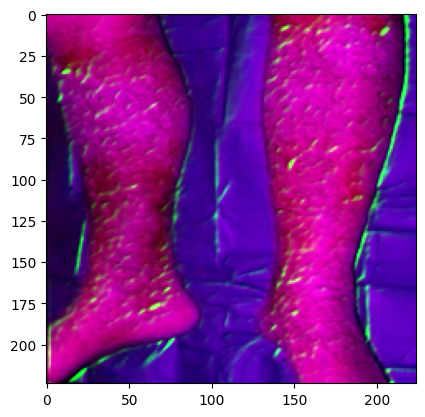

In [ ]:
img=cv2.imread("/content/169.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img1=img
img=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
gamma = 2

img = np.power(img/ 255.0, gamma) * 255.0

# Convert to uint8 data type
img= np.uint8(img)
r,g,b=cv2.split(img1)
img=cv2.merge([r,img,b])
plt.imshow(img)

In [ ]:
y_pred=model.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 244ms/step


In [ ]:
y_pred.shape

(1, 224, 224, 1)

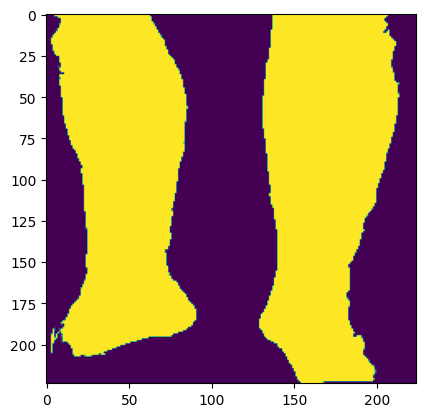

In [ ]:
plt.imshow(y_pred[0])

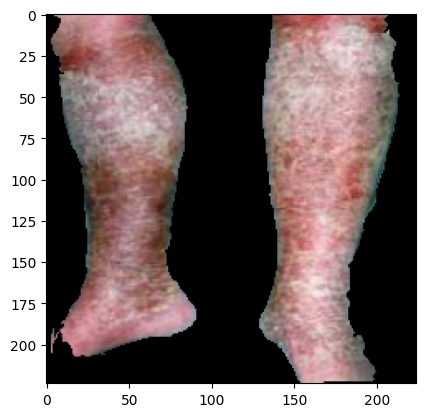

In [ ]:
plt.imshow((y_pred[0]/255)*img1)

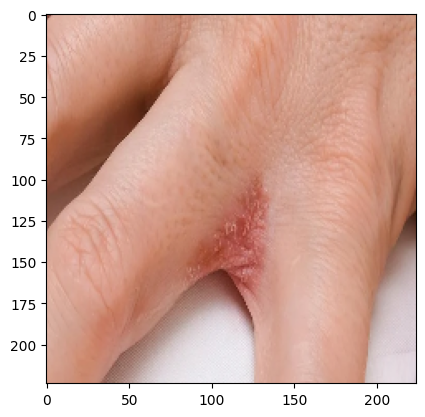

In [ ]:
plt.imshow(img1)

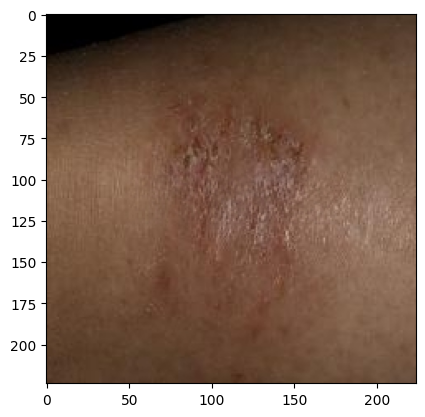

In [ ]:
img=cv2.imread("/content/nummular/1.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
noisy_image = cv2.imread('/content/159.jpg')

# Convert the image to grayscale (if it's a color image)
gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

# Apply the Non-Local Means filter
denoised_image = cv2.fastNlMeansDenoisingColored(gray_image,None, h=10, hForColor=10, templateWindowSize=7, searchWindowSize=21)

# If you have a color image and want to apply NLM denoising to each channel separately:
# denoised_image = cv2.fastNlMeansDenoisingColored(noisy_image, None, h=10, hForColor=10, templateWindowSize=7, searchWindowSize=21)

# Display the original and denoised images
cv2.imshow('Noisy Image', noisy_image)
cv2.imshow('Denoised Image', denoised_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)

error: ignored

(195, 258)


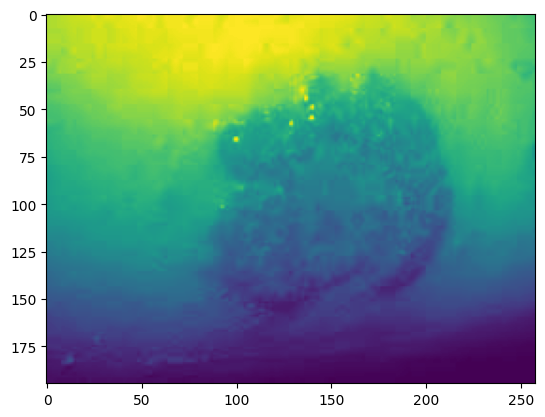

In [ ]:
image = cv2.imread('/content/159.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.imshow(equalized_image)
print(equalized_image.shape)

In [ ]:
plt.imshow(image[0])

IndexError: ignored

In [ ]:
image=np.array(image)

In [ ]:
image.shape

(0,)

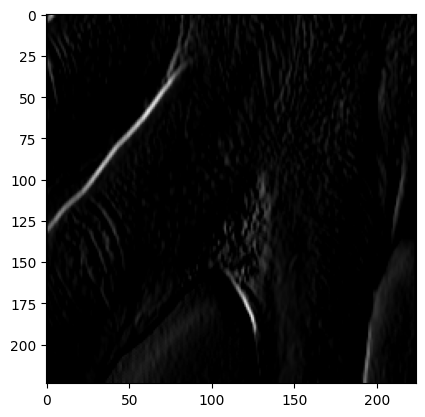

In [ ]:
img=cv2.imread("/content/174.jpg")
img=cv2.resize(img,(224,224))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
enhnace=enhance_texture_with_gabor(img)
plt.imshow(cv2.cvtColor(enhnace,cv2.COLOR_BGR2RGB))

In [ ]:
def enhance_texture_with_gabor(image, ksize=5, sigma=1.0, theta=0, lambd=5.0, gamma=0.5):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    enhanced_texture = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return enhanced_texture

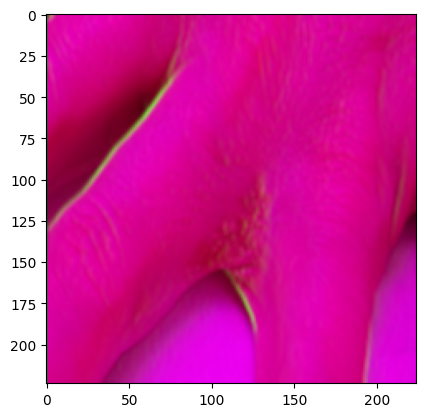

In [ ]:
img=cv2.imread("/content/174.jpg")
img=cv2.resize(img,(224,224))
enhnace=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(img)
img=cv2.merge([r,enhnace,b])
img=cv2.GaussianBlur(img,(3,3),2)
plt.imshow(img)

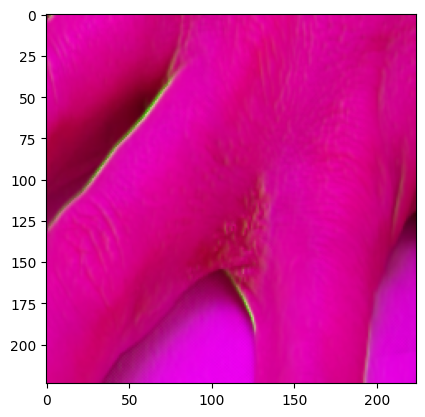

In [ ]:
img=cv2.imread("/content/174.jpg")
img=cv2.resize(img,(224,224))
enhnace=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(img)
img=cv2.merge([r,enhnace,b])
img=cv2.bilateralFilter(img,3,75,75)
plt.imshow(img)

In [ ]:
np.pi

3.141592653589793

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model

# Define the convolutional block
def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    return x

# Define the nested U-Net++ block
def nested_unet_block(input_tensor, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    x = concatenate([x, input_tensor], axis=-1)
    x = conv_block(x, num_filters)
    return x

# Define the U-Net++ architecture
def unet_plusplus(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = conv_block(inputs, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = conv_block(pool3, 512)

    # Nested U-Net++ blocks
    up1 = nested_unet_block(conv4, 256)
    up2 = nested_unet_block(up1, 128)
    up3 = nested_unet_block(up2, 64)

    # Final convolutional layer
    output = Conv2D(num_classes, (1, 1), activation='sigmoid')(up3)

    model = Model(inputs=inputs, outputs=output)

    return model

In [ ]:
df3[['Impressions']]

NameError: ignored

In [ ]:
rm -r nummular

In [ ]:
rm -r 'nummular masks'

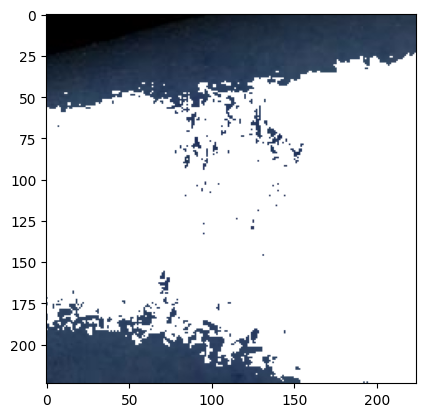

In [ ]:
image = cv2.imread('/content/nummular/1.jpeg')

# Create a mask for the object
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lower_thresh = np.array([0, 0, 0])
upper_thresh = np.array([100, 100, 100])
mask = cv2.inRange(image, lower_thresh, upper_thresh)

# Invert the mask
inverted_mask = cv2.bitwise_not(mask)

# Create a white background
white_background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the background
result = cv2.bitwise_and(white_background, white_background, mask=inverted_mask)

# Combine the object and the background
final_image = cv2.add(image, result)
plt.imshow(final_image)

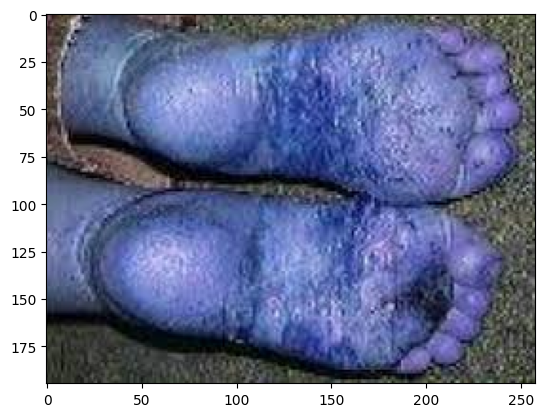

In [ ]:
import skimage.exposure

# load image and get dimensions
img = cv2.imread("/content/nummular/109.jpg")

# convert to hsv
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]

# negate A
A = (255 - A)

# multiply negated A by B
nAB = 255 * (A/255) * (B/255)
nAB = np.clip((nAB), 0, 255)
nAB = np.uint8(nAB)


# threshold using inRange
range1 = 100
range2 = 160
mask = cv2.inRange(nAB,range1,range2)
mask = 255 - mask

# apply morphology opening to mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

# put white where ever the mask is zero
result = img.copy()
result[mask==0] = (255,255,255)

# write result to disk
plt.imshow(result)


In [ ]:
result.shape


(195, 258, 3)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model.save("my_eczema_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

In [ ]:
def enhance_texture_with_gabor(image, ksize=5, sigma=3, theta=np.pi/4, lambd=5, gamma=0.25):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
    enhanced_texture = cv2.filter2D(image,ddepth=-1,kernel=gabor_kernel)
    return enhanced_texture

In [ ]:
model=tf.keras.models.load_model("my_eczema_model.h5")

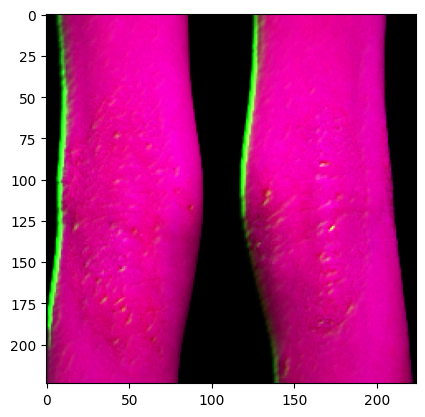

In [ ]:
img=cv2.imread("/content/278.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img1=img
img=enhance_texture_with_gabor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
gamma = 2

img = np.power(img/ 255.0, gamma) * 255.0

# Convert to uint8 data type
img= np.uint8(img)
r,g,b=cv2.split(img1)
img=cv2.merge([r,img,b])
plt.imshow(img)

In [ ]:
y_pred=model.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 51ms/step


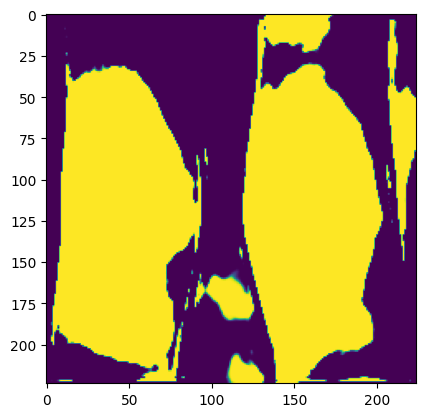

In [ ]:
plt.imshow(y_pred[0])

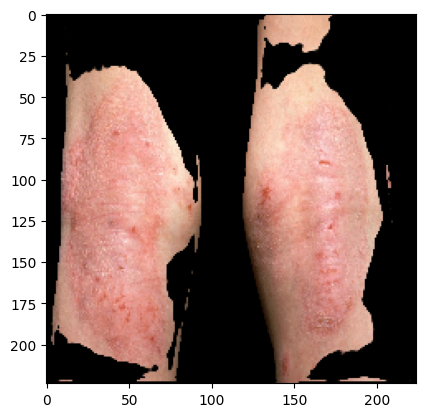

In [ ]:
plt.imshow(img1*y_pred[0]/255)

In [ ]:
+
-